<a href="https://colab.research.google.com/github/themightyNJ/AdRecommendationSys/blob/master/RecommendationSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''Data manipulation libraries'''
import numpy as np
import pandas as pd

In [70]:
'''importing dataset'''
datasetPath = "https://raw.githubusercontent.com/themightyNJ/AdRecommendationSys/master/CoursesDataset_train.json"
coursesDataset = pd.read_json(datasetPath)
print(coursesDataset)

                    Timestamp  ...  Target level
0   2020-01-27 19:53:15-05:30  ...  Intermediate
1   2020-01-27 19:53:33-05:30  ...       Advance
2   2020-01-27 19:54:01-05:30  ...           Hot
3   2020-01-27 19:54:40-05:30  ...         Basic
4   2020-01-27 19:55:04-05:30  ...  Intermediate
..                        ...  ...           ...
787 2020-01-28 20:53:30-05:30  ...           Hot
788 2020-01-28 20:53:52-05:30  ...  Intermediate
789 2020-01-28 20:54:07-05:30  ...       Advance
790 2020-01-28 20:54:24-05:30  ...           Hot
791 2020-01-28 20:54:46-05:30  ...         Basic

[792 rows x 5 columns]


In [71]:
'''Deleting unwanted timestamp column'''
coursesDataset = coursesDataset.drop("Timestamp", axis=1)
coursesDataset.head()

,Current Skills,Current level,Target,Target level
0,python_programming,Basic,python_programming,Intermediate
1,python_programming,Intermediate,python_programming,Advance
2,python_programming,Advance,python_programming,Hot
3,python_programming,Hot,machine_learning,Basic
4,machine_learning,Basic,machine_learning,Intermediate


In [72]:
'''String Manipulation'''
coursesDataset["Current Skills"] = [p.replace("_","") for p in coursesDataset["Current Skills"]]
coursesDataset["Target"] = [q.replace("_","") for q in coursesDataset["Target"]]
coursesDataset["Current level"] = [r.lower() for r in coursesDataset["Current level"]]
coursesDataset["Target level"] = [s.lower() for s in coursesDataset["Target level"]]
coursesDataset.head(10)

,Current Skills,Current level,Target,Target level
0,pythonprogramming,basic,pythonprogramming,intermediate
1,pythonprogramming,intermediate,pythonprogramming,advance
2,pythonprogramming,advance,pythonprogramming,hot
3,pythonprogramming,hot,machinelearning,basic
4,machinelearning,basic,machinelearning,intermediate
5,machinelearning,intermediate,machinelearning,advance
6,machinelearning,advance,machinelearning,hot
7,machinelearning,hot,artificialintelligence,basic
8,cybersecurity,basic,cybersecurity,intermediate
9,cybersecurity,intermediate,cybersecurity,advance


In [0]:
'''Library to encode string data into numerical'''
from sklearn.preprocessing import LabelEncoder

In [74]:
'''Encoding string data into numerical'''
le = LabelEncoder()
'''Encoding returns numpy type data'''
encodedTarget = le.fit_transform(coursesDataset["Target"])
encodedTargetLevel = le.fit_transform(coursesDataset["Target level"])
encodedSkills = le.fit_transform(coursesDataset["Current Skills"])
encodedLevel = le.fit_transform(coursesDataset["Current level"])
'''Converting numpy array into pandas series'''
encodedTarget = pd.Series(encodedTarget,name = "Target Skills")
encodedTargetLevel = pd.Series(encodedTargetLevel,name = "Target Level")
encodedSkills = pd.Series(encodedSkills,name = "Current Skills")
encodedLevel = pd.Series(encodedLevel,name = "Current Level")
print("encodedTarget = ",encodedTarget,end = "\n")
print("encodedTargetLevel = ",encodedTargetLevel,end = "\n")
print("encodedSkills = ",encodedSkills,end = "\n")
print("encodedLevel = ",encodedLevel,end = "\n")

encodedTarget =  0      21
1      21
2      21
3      17
4      17
       ..
787     1
788    19
789    19
790    19
791    14
Name: Target Skills, Length: 792, dtype: int64
encodedTargetLevel =  0      3
1      0
2      2
3      1
4      3
      ..
787    2
788    3
789    0
790    2
791    1
Name: Target Level, Length: 792, dtype: int64
encodedSkills =  0      21
1      21
2      21
3      21
4      17
       ..
787     1
788    19
789    19
790    19
791    19
Name: Current Skills, Length: 792, dtype: int64
encodedLevel =  0      1
1      3
2      0
3      2
4      1
      ..
787    0
788    1
789    3
790    0
791    2
Name: Current Level, Length: 792, dtype: int64


In [75]:
'''Combining individual pandas series into pandas dataframe'''
encodedDataset = pd.concat([encodedSkills,encodedLevel,encodedTarget,encodedTargetLevel],axis = 1)
encodedDataset.head()

,Current Skills,Current Level,Target Skills,Target Level
0,21,1,21,3
1,21,3,21,0
2,21,0,21,2
3,21,2,17,1
4,17,1,17,3


In [0]:
'''Library for Exploratory Data Analysis (EDA)'''
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
x = encodedDataset[["Current Skills","Current Level"]]
y = encodedDataset[["Target Skills","Target Level"]]

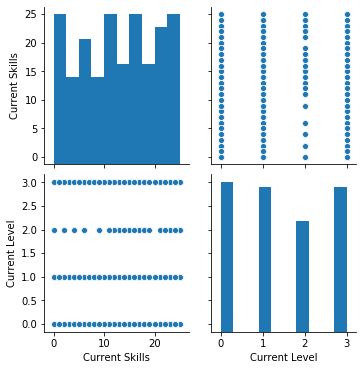

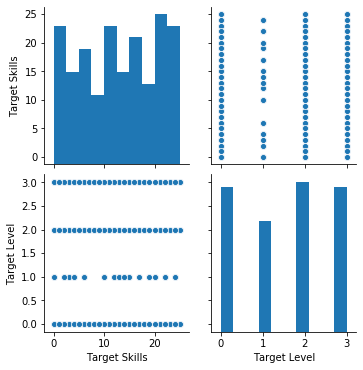

In [78]:
sns.pairplot(x)
plt.show()
sns.pairplot(y)
plt.show()

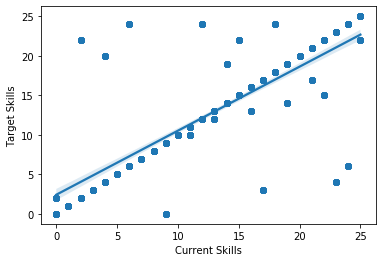

In [79]:
sns.regplot(x["Current Skills"],y["Target Skills"])

In [80]:
'''Random Forest'''
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [81]:
'''importing test dataset'''
testdatasetPath = "https://raw.githubusercontent.com/themightyNJ/AdRecommendationSys/master/CoursesDataset_test.json"
testcoursesDataset = pd.read_json(testdatasetPath)
print(testcoursesDataset)

                   Timestamp  ...  Target level
0  2020-01-27 19:53:15-05:30  ...  Intermediate
1  2020-01-27 19:53:33-05:30  ...       Advance
2  2020-01-27 19:54:01-05:30  ...           Hot
3  2020-01-27 19:54:40-05:30  ...         Basic
4  2020-01-27 19:55:04-05:30  ...  Intermediate
..                       ...  ...           ...
94 2020-01-28 20:53:30-05:30  ...           Hot
95 2020-01-28 20:53:52-05:30  ...  Intermediate
96 2020-01-28 20:54:07-05:30  ...       Advance
97 2020-01-28 20:54:24-05:30  ...           Hot
98 2020-01-28 20:54:46-05:30  ...         Basic

[99 rows x 5 columns]


In [82]:
'''Deleting unwanted timestamp column'''
testcoursesDataset = testcoursesDataset.drop("Timestamp", axis=1)
testcoursesDataset.head()

,Current Skills,Current level,Target,Target level
0,python_programming,Basic,python_programming,Intermediate
1,python_programming,Intermediate,python_programming,Advance
2,python_programming,Advance,python_programming,Hot
3,python_programming,Hot,machine_learning,Basic
4,machine_learning,Basic,machine_learning,Intermediate


In [83]:
'''String Manipulation'''
testcoursesDataset["Current Skills"] = [p.replace("_","") for p in testcoursesDataset["Current Skills"]]
testcoursesDataset["Target"] = [q.replace("_","") for q in testcoursesDataset["Target"]]
testcoursesDataset["Current level"] = [r.lower() for r in testcoursesDataset["Current level"]]
testcoursesDataset["Target level"] = [s.lower() for s in testcoursesDataset["Target level"]]
testcoursesDataset.head(10)

,Current Skills,Current level,Target,Target level
0,pythonprogramming,basic,pythonprogramming,intermediate
1,pythonprogramming,intermediate,pythonprogramming,advance
2,pythonprogramming,advance,pythonprogramming,hot
3,pythonprogramming,hot,machinelearning,basic
4,machinelearning,basic,machinelearning,intermediate
5,machinelearning,intermediate,machinelearning,advance
6,machinelearning,advance,machinelearning,hot
7,machinelearning,hot,artificialintelligence,basic
8,cybersecurity,basic,cybersecurity,intermediate
9,cybersecurity,intermediate,cybersecurity,advance


In [84]:
'''Encoding returns numpy type data'''
testencodedTarget = le.fit_transform(testcoursesDataset["Target"])
testencodedTargetLevel = le.fit_transform(testcoursesDataset["Target level"])
testencodedSkills = le.fit_transform(testcoursesDataset["Current Skills"])
testencodedLevel = le.fit_transform(testcoursesDataset["Current level"])
'''Converting numpy array into pandas series'''
testencodedTarget = pd.Series(testencodedTarget,name = "Target Skills")
testencodedTargetLevel = pd.Series(testencodedTargetLevel,name = "Target Level")
testencodedSkills = pd.Series(testencodedSkills,name = "Current Skills")
testencodedLevel = pd.Series(testencodedLevel,name = "Current Level")
print("encodedTarget = ",testencodedTarget,end = "\n")
print("encodedTargetLevel = ",testencodedTargetLevel,end = "\n")
print("encodedSkills = ",testencodedSkills,end = "\n")
print("encodedLevel = ",testencodedLevel,end = "\n")

encodedTarget =  0     21
1     21
2     21
3     17
4     17
      ..
94     1
95    19
96    19
97    19
98    14
Name: Target Skills, Length: 99, dtype: int64
encodedTargetLevel =  0     3
1     0
2     2
3     1
4     3
     ..
94    2
95    3
96    0
97    2
98    1
Name: Target Level, Length: 99, dtype: int64
encodedSkills =  0     21
1     21
2     21
3     21
4     17
      ..
94     1
95    19
96    19
97    19
98    19
Name: Current Skills, Length: 99, dtype: int64
encodedLevel =  0     1
1     3
2     0
3     2
4     1
     ..
94    0
95    1
96    3
97    0
98    2
Name: Current Level, Length: 99, dtype: int64


In [85]:
'''Combining individual pandas series into pandas dataframe'''
testencodedDataset = pd.concat([testencodedSkills,testencodedLevel,testencodedTarget,testencodedTargetLevel],axis = 1)
testencodedDataset.head()

,Current Skills,Current Level,Target Skills,Target Level
0,21,1,21,3
1,21,3,21,0
2,21,0,21,2
3,21,2,17,1
4,17,1,17,3


In [0]:
x_test = testencodedDataset[["Current Skills","Current Level"]]
y_test = testencodedDataset[["Target Skills","Target Level"]]

In [0]:
y_pred  = regressor.predict(x_test)

In [88]:
regressor.score(x_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


1.0

In [89]:
type(y_test)

pandas.core.frame.DataFrame

In [90]:
type(y_pred)

numpy.ndarray

In [91]:
y_test

,Target Skills,Target Level
0,21,3
1,21,0
2,21,2
3,17,1
4,17,3
...,...,...
94,1,2
95,19,3
96,19,0
97,19,2


In [0]:
y_pred = pd.DataFrame(y_pred)

In [0]:
y_pred = y_pred.astype(int)

In [0]:
result = pd.concat([y_test,y_pred],axis = 1)

In [95]:
print(result)

    Target Skills  Target Level   0  1
0              21             3  21  3
1              21             0  21  0
2              21             2  21  2
3              17             1  17  1
4              17             3  17  3
..            ...           ...  .. ..
94              1             2   1  2
95             19             3  19  3
96             19             0  19  0
97             19             2  19  2
98             14             1  14  1

[99 rows x 4 columns]


In [96]:
result.rename(columns={0 : "Pred Skills",1 : "Pred Level"})

,Target Skills,Target Level,Pred Skills,Pred Level
0,21,3,21,3
1,21,0,21,0
2,21,2,21,2
3,17,1,17,1
4,17,3,17,3
...,...,...,...,...
94,1,2,1,2
95,19,3,19,3
96,19,0,19,0
97,19,2,19,2
